# Quiz 2: Ciencia de Datos

&emsp; **Asignatura:** Big Data. <br>
&emsp; **Profesor:** Juan Martín Londoño Zuluaga. <br>
&emsp; **Período:** 2023-I.

Usted es un o una analista de datos contratada por una prestigiosa aerolínea, FULL Stars, para el análisis de los retrasos en los vuelos de EE.UU. A esta aerolínea le importa bastante este análisis, ya que quiere basar su valor diferenciador en el mercado en el cumplimiento de los horarios de vuelo estpipulados en sus ventas. 

Bajo ese contexto, se le ha entregado una base de datos que cuenta con una amplia gana de variables, incluyendo variables de retraso en minutos de los vuelos, ciudad de origen, ciudad de destino, tiempo de vuelo, entre otros. La explicación de la base de datos la puede encontrar en la [siguiente página](https://www.kaggle.com/datasets/whenamancodes/flight-delay-prediction).

En ese sentido, la Junta Directiva de la aerolínea le hace las siguientes preguntas:

# 1. Importe de datos

Importe los datos del archivo `flight_data_2018_to_2022.csv`:

In [1]:
# Importando la librería
import pandas as pd

# Cambiando la preferencia de máxima cantidad de columnas mostradas
pd.options.display.max_columns = 100

# Cargando los datos
aviation = pd.read_csv('datain/AviationData.csv', sep = ',', encoding='cp1252')
aviation.head()

C:\Users\juanm\AppData\Local\Temp\ipykernel_9256\2570942111.py:8: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation = pd.read_csv('datain/AviationData.csv', sep = ',', encoding='cp1252')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 2. Calidad de la base de datos

## 2.1. Número de valores únicos

Encuentre el número de valores únicos que tiene cada una de las columnas de la base de datos:

In [2]:
aviation.nunique()

Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25592
Longitude                 27156
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

In [3]:
for val in aviation.columns:
    print("="*64 + "\n" + val + "\n" + "="*64)
    print(aviation[val].unique())

Event.Id
['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']
Investigation.Type
['Accident' 'Incident']
Accident.Number
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097']
Event.Date
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']
Location
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']
Country
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa Rica' 'Mozambique' 'Jamaica' 

## 2.2. Número de valores perdidos

Encuentre el porcentaje de valores perdidos para cada una de las columnas de la base de datos:

In [4]:
round(aviation.isnull().sum()/len(aviation)*100, 2)

Event.Id                   0.00
Investigation.Type         0.00
Accident.Number            0.00
Event.Date                 0.00
Location                   0.06
Country                    0.25
Latitude                  61.32
Longitude                 61.33
Airport.Code              43.47
Airport.Name              40.61
Injury.Severity            1.12
Aircraft.damage            3.59
Aircraft.Category         63.68
Registration.Number        1.48
Make                       0.07
Model                      0.10
Amateur.Built              0.11
Number.of.Engines          6.84
Engine.Type                7.96
FAR.Description           63.97
Schedule                  85.85
Purpose.of.flight          6.97
Air.carrier               81.27
Total.Fatal.Injuries      12.83
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Total.Uninjured            6.65
Weather.Condition          5.05
Broad.phase.of.flight     30.56
Report.Status              7.18
Publication.Date          15.49
dtype: f

Encuentre las 10 variables con mayor porcentaje de pérdida de valores:

In [5]:
round(aviation.isnull().sum()/len(aviation)*100, 2).sort_values(ascending = False).head(10)

Schedule                 85.85
Air.carrier              81.27
FAR.Description          63.97
Aircraft.Category        63.68
Longitude                61.33
Latitude                 61.32
Airport.Code             43.47
Airport.Name             40.61
Broad.phase.of.flight    30.56
Publication.Date         15.49
dtype: float64

Encuentre las 10 variables con menor porcentaje de pérdida de valores:

In [6]:
round(aviation.isnull().sum()/len(aviation)*100, 2).sort_values(ascending = True).head(10)

Event.Id              0.00
Investigation.Type    0.00
Accident.Number       0.00
Event.Date            0.00
Location              0.06
Make                  0.07
Model                 0.10
Amateur.Built         0.11
Country               0.25
Injury.Severity       1.12
dtype: float64

¿Qué estrategia trataría para darle un manejo a los datos perdidos? (No la desarrolle, solamente nómbrela).

# 3. Análisis univariado

Responda a las siguientes preguntas:

1. ¿Cuál es el aeropuerto que ha sido experimentado más accidentes  (variables `Airport.Code` y `Airport.Name`)? 
2. Teniendo en cuenta que VMC es Visual Meteorological Conditions, IMC es Instrumental Meteorological Conditions y UNK es Unknown, ¿en qué tipo de condiciones meteorológicas hay más accidentes (variable `Weather.Condition`)?
3. ¿En qué tipo de vehículo se ha registrado el mayor número de accidentes (variable `Aircraft.Category`)?
4. ¿En qué etapa del vuelo se han producido más accidentes (variable `Broad.phase.of.flight`)?

In [7]:
# Definying copy of the dataset
df_temp = aviation.copy()

# NL Preprocessing
df_temp["Airport.Name"] = df_temp["Airport.Name"].str.upper()
df_temp["Airport.Code"] = df_temp["Airport.Code"].str.upper()

# Processing
df_temp[["Airport.Name", "Airport.Code", "Event.Id"]]\
    .groupby(["Airport.Code", "Airport.Name"]).count().reset_index()\
    .rename(columns = {"Event.Id": "no_accidentes"})\
    .sort_values("no_accidentes", ascending = False)\
    .head(10)


,Airport.Code,Airport.Name,no_accidentes
17196,NONE,PRIVATE,161
19458,PVT,PRIVATE,120
6267,APA,CENTENNIAL,99
22771,VNY,VAN NUYS,92
17203,NONE,PRIVATE AIRSTRIP,90
15946,MRI,MERRILL FIELD,85
17145,NONE,NONE,74
22714,VGT,NORTH LAS VEGAS,71
7997,CNO,CHINO,66
20751,SEZ,SEDONA,60


In [8]:
# Definying copy of the dataset
df_temp = aviation.copy()

# NL Preprocessing
df_temp["Weather.Condition"] = df_temp["Weather.Condition"].str.upper()

# Processing
df_temp[["Weather.Condition", "Event.Id"]]\
    .groupby(["Weather.Condition"]).count().reset_index()\
    .rename(columns = {"Event.Id": "no_accidentes"})\
    .sort_values("no_accidentes", ascending = False)\
    .head(10)

,Weather.Condition,no_accidentes
2,VMC,77303
0,IMC,5976
1,UNK,1118


In [9]:
# Definying copy of the dataset
df_temp = aviation.copy()

var = "Aircraft.Category"

# NL Preprocessing
df_temp[var] = df_temp[var].str.upper()

# Processing
df_temp[[var, "Event.Id"]]\
    .groupby([var]).count().reset_index()\
    .rename(columns = {"Event.Id": "no_accidentes"})\
    .sort_values("no_accidentes", ascending = False)\
    .head(10)

,Aircraft.Category,no_accidentes
0,AIRPLANE,27617
5,HELICOPTER,3440
3,GLIDER,508
1,BALLOON,231
4,GYROCRAFT,173
13,WEIGHT-SHIFT,161
6,POWERED PARACHUTE,91
10,ULTRALIGHT,30
12,UNKNOWN,14
14,WSFT,9


In [10]:
# Definying copy of the dataset
df_temp = aviation.copy()

var = "Broad.phase.of.flight"

# NL Preprocessing
df_temp[var] = df_temp[var].str.upper()

# Processing
df_temp[[var, "Event.Id"]]\
    .groupby([var]).count().reset_index()\
    .rename(columns = {"Event.Id": "no_accidentes"})\
    .sort_values("no_accidentes", ascending = False)\
    .head(10)

,Broad.phase.of.flight,no_accidentes
5,LANDING,15428
9,TAKEOFF,12493
2,CRUISE,10269
6,MANEUVERING,8144
0,APPROACH,6546
1,CLIMB,2034
10,TAXI,1958
3,DESCENT,1887
4,GO-AROUND,1353
8,STANDING,945


# 4. Análisis Multivariado

## 4.1. Análisis temporal

### 4.1.1. Accidentes por año (> 1990)

Realice una gráfica de línea (_lineplot_) que muestre el número de accidentes por año entre 1990 y 2022. Para ello, primero cree dos variables de temporalidad: una para el año (llamada `year`) y otra para el mes (llamada `month`).

> **Nota:** para obtener el año y el mes de una fecha (`Event.Date`), se recomienda el uso de `pd.to_datetime()`.

In [11]:
# Converting event date to datetime
aviation['Event.Date'] = pd.to_datetime(aviation['Event.Date'])

# Creating year and month variables
aviation["month"] = aviation['Event.Date'].dt.month
aviation["year"] = aviation['Event.Date'].dt.year

Ahora que tiene estas variables listas, grafique la serie de tiempo de accidentes por cada año desde 1990 a 2022:

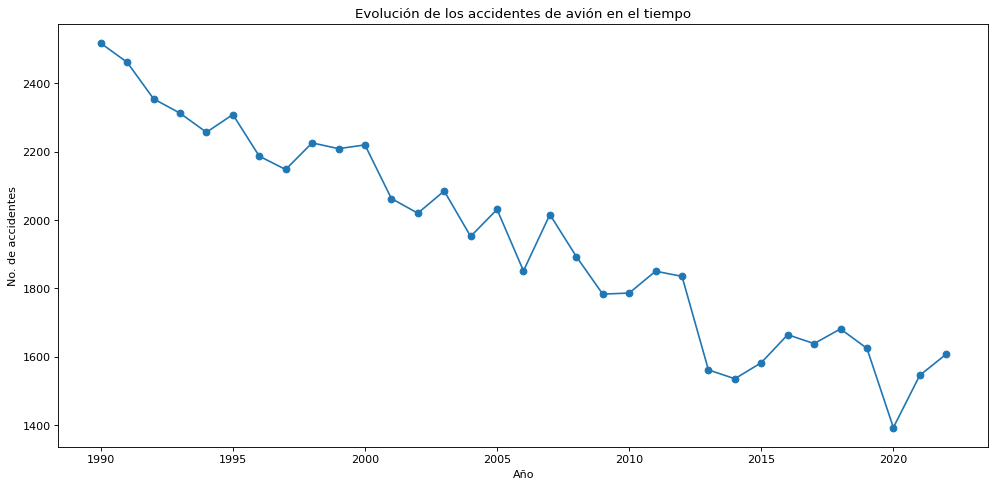

In [12]:
# Importando la librería matplotlib
import matplotlib.pyplot as plt

# Filtering after 1990
df_temp = aviation[aviation['year'] >= 1990]

# Creating the dataframe with the data
df_temp = df_temp[['year', 'Event.Id']].groupby('year').count().reset_index()

# Estableciendo tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Generando la gráfica
plt.plot('year', 'Event.Id', data = df_temp, marker = "o") # Gráfica de línea

# Añadiendo elementos
plt.title('Evolución de los accidentes de avión en el tiempo') # Título de la gráfica
plt.xlabel('Año') # Título del eje x
plt.ylabel('No. de accidentes') # Título del eje y

plt.show() # Se muestra la gráfica

### 4.1.2. Suma de personas heridas a fatalidad por año (> 1990)

Ahora realice la misma gráfica, pero sumando el número de heridos por fatalidad por año (variable `Total.Fatal.Injuries`).

> **Nota:** para ello, utilice el método `sum()` en vez del `count()`.

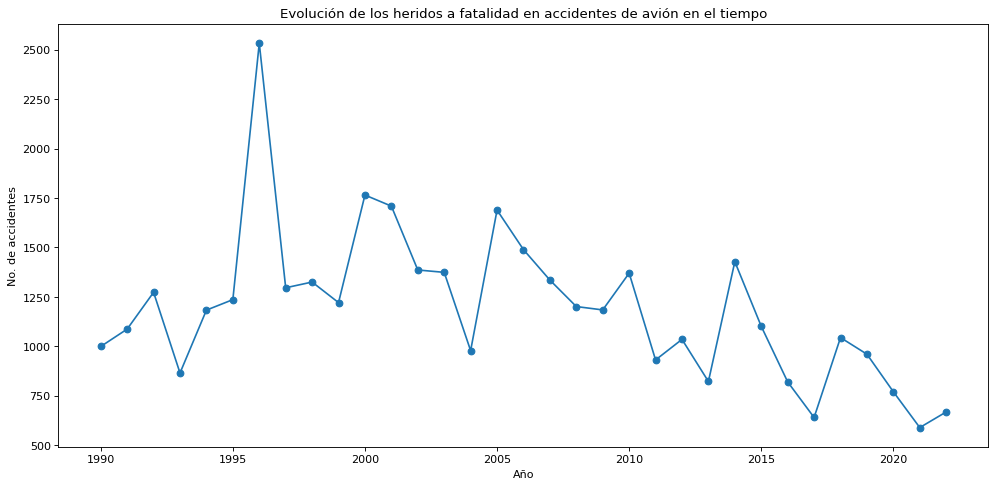

In [13]:
# Importando la librería matplotlib
import matplotlib.pyplot as plt

# Filtering after 1990
df_temp = aviation[aviation['year'] >= 1990]

# Creating the dataframe with the data
df_temp = df_temp[['year', 'Total.Fatal.Injuries']].groupby('year').sum().reset_index()

# Estableciendo tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Generando la gráfica
plt.plot('year', 'Total.Fatal.Injuries', data = df_temp, marker = "o") # Gráfica de línea

# Añadiendo elementos
plt.title('Evolución de los heridos a fatalidad en accidentes de avión en el tiempo') # Título de la gráfica
plt.xlabel('Año') # Título del eje x
plt.ylabel('No. de accidentes') # Título del eje y

plt.show() # Se muestra la gráfica

### 4.1.3. Número promedio de personas heridas a fatalidad (>1990)

Por último, realice una gráfica en la que demuestre el número promedio de personas heridas a fatalidad (variable `Total.Fatal.Injuries`) por año posterior a 1990.

> **Nota:** para este caso, utilice el método `mean()` en vez de `sum()` o `count()`.

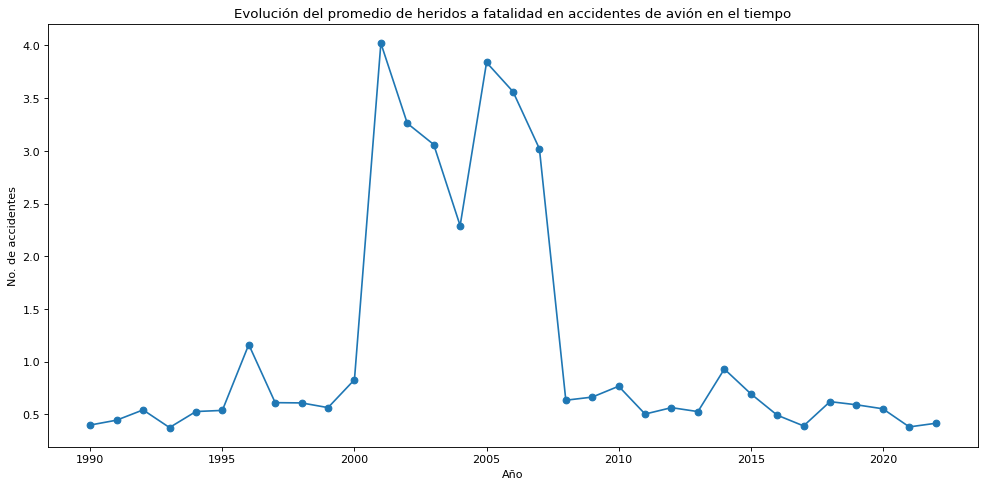

In [14]:
# Importando la librería matplotlib
import matplotlib.pyplot as plt

# Filtering after 1990
df_temp = aviation[aviation['year'] >= 1990]

# Creating the dataframe with the data
df_temp = df_temp[['year', 'Total.Fatal.Injuries']].groupby('year').mean().reset_index()

# Estableciendo tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Generando la gráfica
plt.plot('year', 'Total.Fatal.Injuries', data = df_temp, marker = "o") # Gráfica de línea

# Añadiendo elementos
plt.title('Evolución del promedio de heridos a fatalidad en accidentes de avión en el tiempo') # Título de la gráfica
plt.xlabel('Año') # Título del eje x
plt.ylabel('No. de accidentes') # Título del eje y

plt.show() # Se muestra la gráfica

### 4.1.4. Análisis de los resultados encontrados

A partir de los análisis anteriormente generados, responda a las siguientes preguntas:

1. ¿Qué patrones de comportamiento encuentra? ¿Existe una tendencia en el número de accidentes y heridos a fatalidad? ¿Existe un patrón cíclico?
2. ¿Alrededor de qué período de tiempo se podría considerar que fue el más fatal para los accidentes de avión registrados?

## 4.2. Distribución conjunta de datos

Realice un análisis del número de accidentes y el número de motores del avión implicado en el accidente (`Number.of.Engines`). Esto se puede realizar a partir de un _boxplot_.

Por ello, tome la siguiente base de datos:

In [15]:
# Filtering after 1990
df_temp = aviation[aviation['year'] >= 1990]

# Creating the dataframe with the data
df_temp = df_temp[['year', 'Event.Id', 'Number.of.Engines']]\
    .groupby(['year', 'Number.of.Engines']).count().reset_index()

Grafique  el número de accidentes y el número de motores del avión envuelto en el accidente:

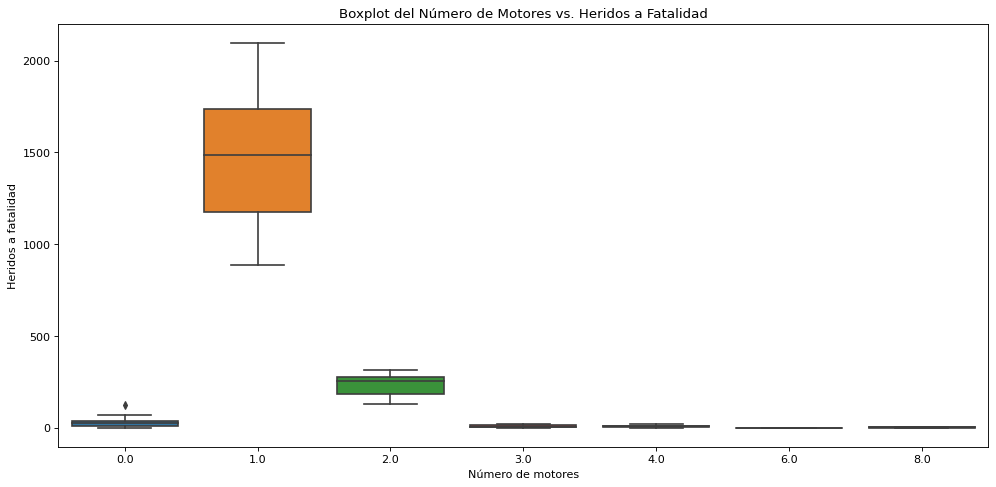

In [16]:
# Importamos seaborn
import seaborn as sns

# Tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Boxplot
sns.boxplot(x = 'Number.of.Engines', y = 'Event.Id', data = df_temp) # Se genera la gráfica: boxplot

# Cambio de los títulos de los ejes X e Y
plt.ylabel("Heridos a fatalidad"); plt.xlabel("Número de motores") # Eje Y y X

# Cambio del título de la gráfica
plt.title("Boxplot del Número de Motores vs. Heridos a Fatalidad") # Título de la gráfica

# Se muestra la gráfica
plt.show()

Responda a las siguientes preguntas:
1. ¿Qué observa a partir del gráfico generado? ¿Se observa alguna tendencia particular?
2. ¿Cómo se comportan los datos atípicos? ¿Existen muchos o pocos?

## 4.3. Correlaciones

Realice un análisis de correlación entre diferentes variables y el número de personas que **no tuvieron heridas** en los accidentes (variable `Total.Uninjured`). Para ello, primero ejecute la siguiente línea de código:

In [17]:
# Subsetting the dataset
vars = ['Investigation.Type', 'Aircraft.damage', 
        'Number.of.Engines', 'Engine.Type', 'Weather.Condition', 
        'Broad.phase.of.flight', 'Total.Fatal.Injuries', 
        'Total.Serious.Injuries', 'Total.Minor.Injuries', 
        'Total.Uninjured']

aviation_subset = aviation[vars]

# Subsetting the data
aviation_subset = aviation_subset[~(aviation_subset['Number.of.Engines'].isnull())]

# Generating dummies for categorical data
aviation_subset = pd.get_dummies(aviation_subset)

aviation_subset

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Investigation.Type_Accident,Investigation.Type_Incident,Aircraft.damage_Destroyed,Aircraft.damage_Minor,Aircraft.damage_Substantial,Aircraft.damage_Unknown,Engine.Type_Electric,Engine.Type_Geared Turbofan,Engine.Type_Hybrid Rocket,Engine.Type_LR,Engine.Type_NONE,Engine.Type_None,Engine.Type_Reciprocating,Engine.Type_Turbo Fan,Engine.Type_Turbo Jet,Engine.Type_Turbo Prop,Engine.Type_Turbo Shaft,Engine.Type_UNK,Engine.Type_Unknown,Weather.Condition_IMC,Weather.Condition_UNK,Weather.Condition_Unk,Weather.Condition_VMC,Broad.phase.of.flight_Approach,Broad.phase.of.flight_Climb,Broad.phase.of.flight_Cruise,Broad.phase.of.flight_Descent,Broad.phase.of.flight_Go-around,Broad.phase.of.flight_Landing,Broad.phase.of.flight_Maneuvering,Broad.phase.of.flight_Other,Broad.phase.of.flight_Standing,Broad.phase.of.flight_Takeoff,Broad.phase.of.flight_Taxi,Broad.phase.of.flight_Unknown
0,1.0,2.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1.0,4.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,3.0,NaN,NaN,NaN,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,2.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2.0,NaN,NaN,1.0,44.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,2.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88873,1.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
88876,2.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88877,1.0,0.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


A partir de la base de datos `aviation_subset`, calcule la correlación entre las variables que la componen con la variable `Total.Uninjured`. Acto seguido, muestre las 10 variables que mayor **correlación positiva** tienen con el número de personas no heridas.

In [18]:
# Calculating the list of correlations
corr       = aviation_subset.corr()
pos_cor    = corr['Total.Uninjured'] > 0 # Positive correlations
neg_cor    = corr['Total.Uninjured'] < 0

In [19]:
# Correlación positiva por valor mayor positivo
corr['Total.Uninjured'][pos_cor].sort_values(ascending = False).head(10)

Total.Uninjured                   1.000000
Engine.Type_Turbo Fan             0.575505
Number.of.Engines                 0.406058
Investigation.Type_Incident       0.364988
Aircraft.damage_Minor             0.257837
Total.Minor.Injuries              0.169398
Engine.Type_Turbo Jet             0.166627
Broad.phase.of.flight_Taxi        0.091036
Broad.phase.of.flight_Standing    0.065182
Weather.Condition_Unk             0.051141
Name: Total.Uninjured, dtype: float64

In [21]:
# Correlación positiva por valor mayor positivo
corr['Total.Uninjured'][neg_cor].sort_values(ascending = True).head(10)

Investigation.Type_Accident         -0.364988
Engine.Type_Reciprocating           -0.306964
Aircraft.damage_Substantial         -0.162442
Aircraft.damage_Destroyed           -0.081398
Weather.Condition_VMC               -0.068071
Broad.phase.of.flight_Maneuvering   -0.047831
Broad.phase.of.flight_Landing       -0.027926
Engine.Type_Turbo Shaft             -0.026172
Total.Fatal.Injuries                -0.019043
Broad.phase.of.flight_Go-around     -0.014692
Name: Total.Uninjured, dtype: float64

A partir de los datos obtenidos, responda:

1. ¿Se puede establecer que hay variables que pueden ser determinantes para la supervivencia y evasión de heridas de las personas en los accidentes?
2. ¿Estas conclusiones sirven para asesorar una empresa de aviación?

<Figure size 1200x560 with 0 Axes>

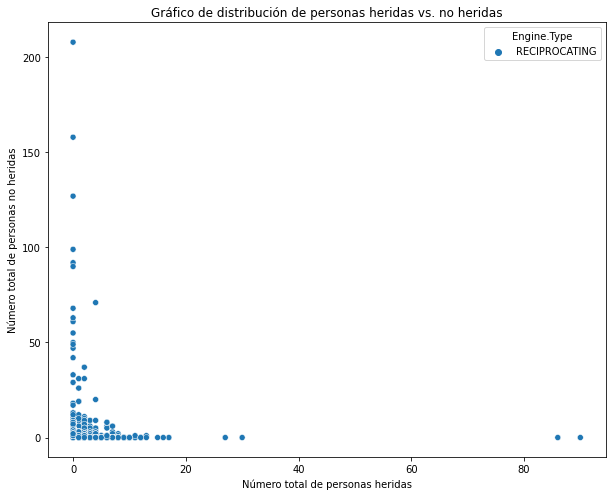

<Figure size 1200x560 with 0 Axes>

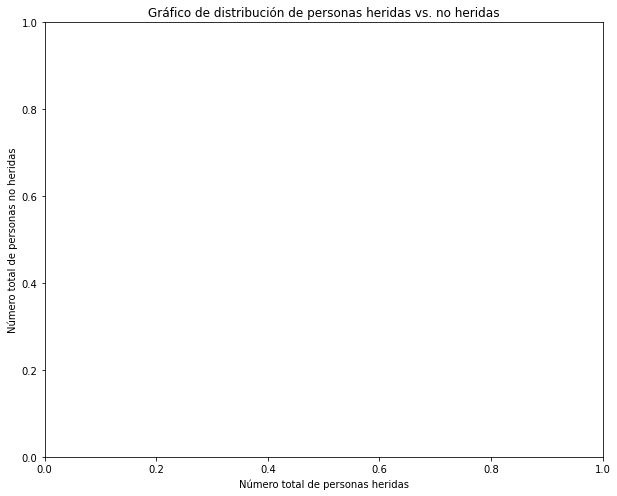

<Figure size 1200x560 with 0 Axes>

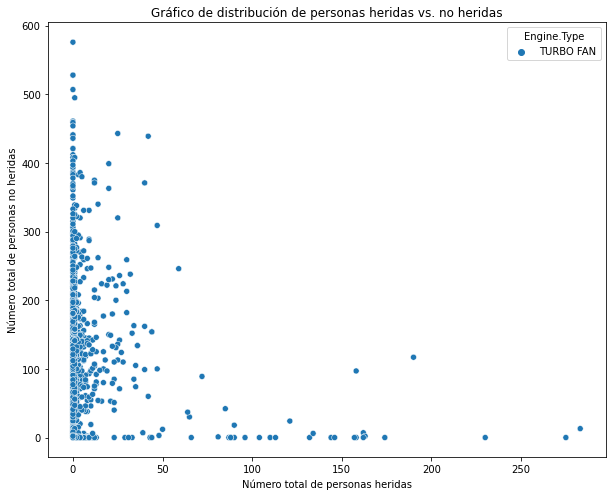

<Figure size 1200x560 with 0 Axes>

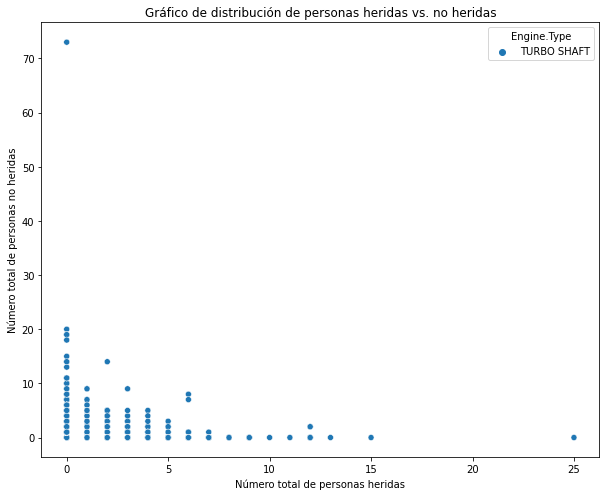

<Figure size 1200x560 with 0 Axes>

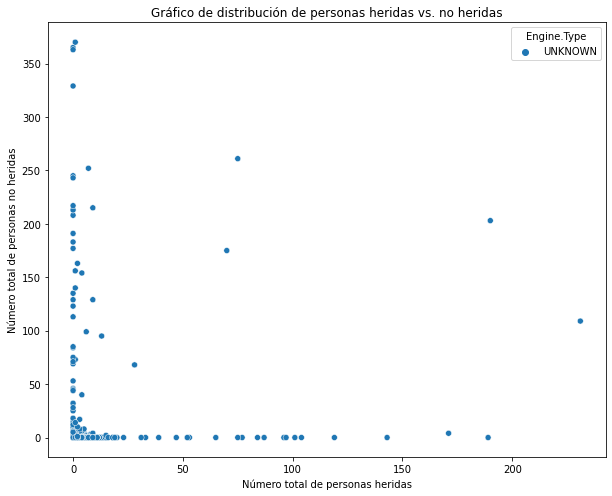

<Figure size 1200x560 with 0 Axes>

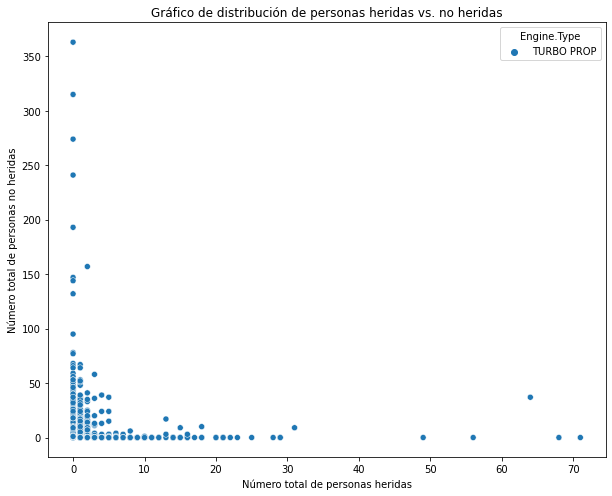

<Figure size 1200x560 with 0 Axes>

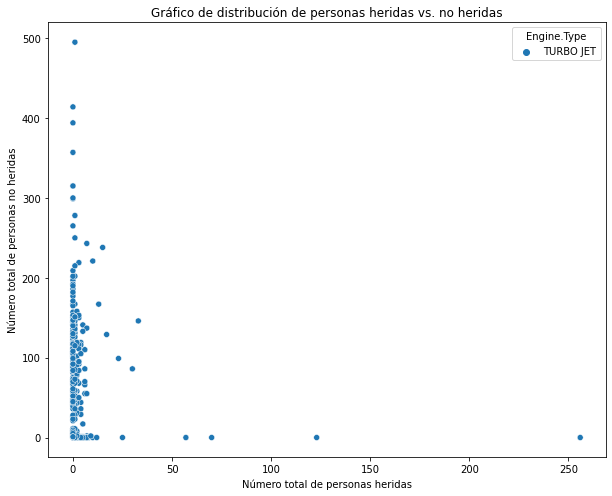

<Figure size 1200x560 with 0 Axes>

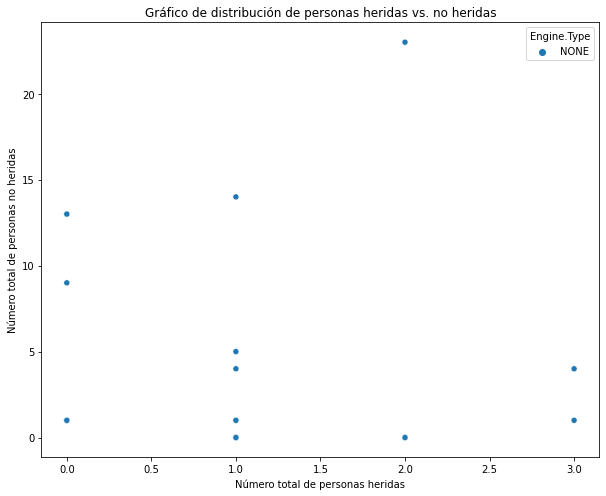

<Figure size 1200x560 with 0 Axes>

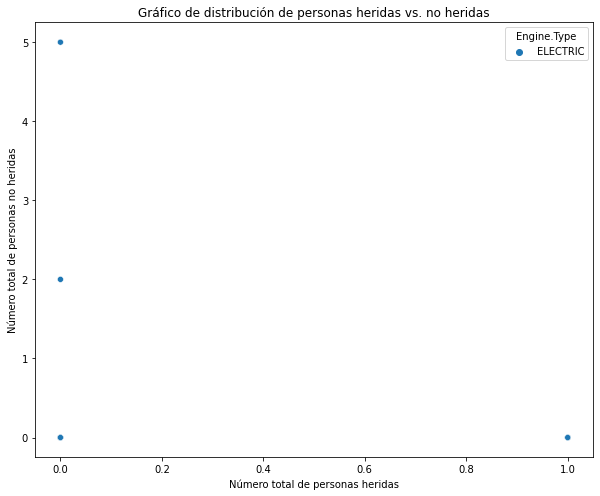

<Figure size 1200x560 with 0 Axes>

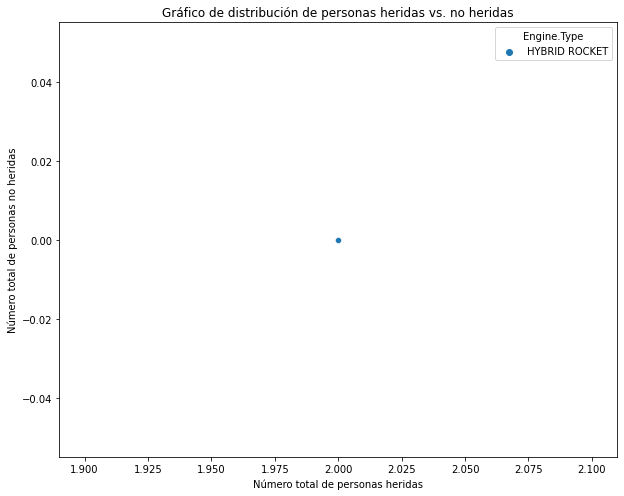

<Figure size 1200x560 with 0 Axes>

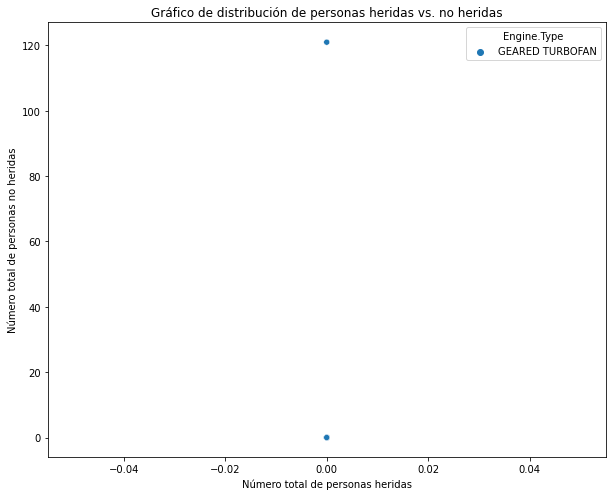

<Figure size 1200x560 with 0 Axes>

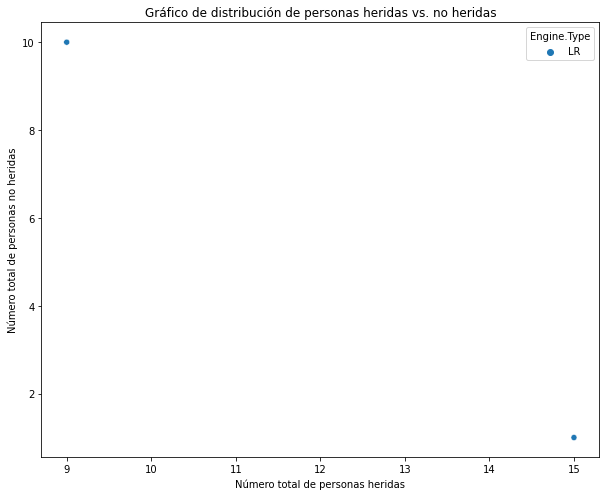

<Figure size 1200x560 with 0 Axes>

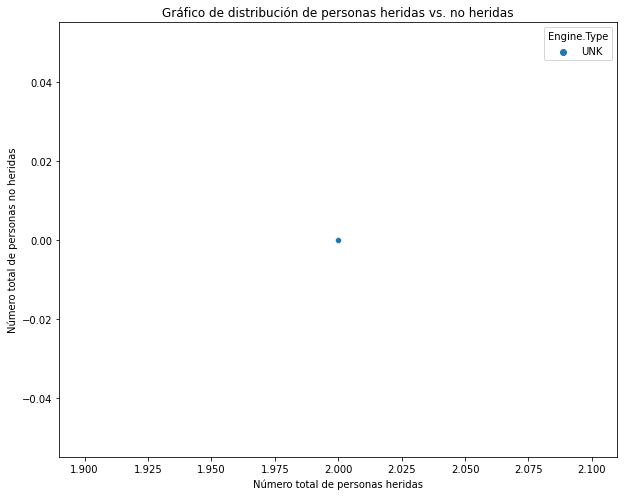

In [33]:
import seaborn as sns

# Creating a new variable
aviation['Total.Injured'] = aviation['Total.Fatal.Injuries'] +  aviation['Total.Serious.Injuries'] + aviation['Total.Minor.Injuries']
aviation['Engine.Type'] = aviation['Engine.Type'].str.upper()

i = 0
for eng_type in aviation['Engine.Type'].unique():
    
    df_temp = aviation[(aviation['Engine.Type'] == eng_type)]

    # Estableciendo tamaño de la gráfica
    plt.figure(figsize=(15, 7), dpi = 80) 

    # Gráfico de densidad
    plt.figure(figsize = (10,8))
    sns.scatterplot(x = 'Total.Injured', y = 'Total.Uninjured',\
                        hue = 'Engine.Type', data = df_temp)
    plt.ylabel("Número total de personas no heridas"); plt.xlabel("Número total de personas heridas")
    plt.title("Gráfico de distribución de personas heridas vs. no heridas")
    plt.savefig('output/' + str(eng_type) + '.jpg')
    plt.show()

    i += 1